In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cd /content/gdrive/MyDrive/kaggle

In [ ]:
#!mkdir /content/gdrive/MyDrive/kaggle/data
#!unzip /content/gdrive/MyDrive/kaggle/aptos2019-blindness-detection.zip -d /content/gdrive/MyDrive/kaggle/data 
!ls /content/gdrive/MyDrive/kaggle/data/

 assets			  model1-1.h5		   submission.gsheet
 graph-model1-1acc.png	  model2		   test.csv
 graph-model1-1loss.png   model2.h5		   test_images
 graph-model1-acc.png	  preview		   train.csv
 graph-model1-loss.png	  sample_submission.csv    train_images
 graph-model2-acc.png	  saved_model.pb	   variables
 graph-model2-loss.png	 'submission (1).gsheet'
 model1			  submission.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("/content/gdrive/MyDrive/kaggle/data"))
#https://www.kaggle.com/gkcsml1020/aptos-blindness-detection-basic-cnn/edit


['test.csv', 'sample_submission.csv', 'train.csv', 'test_images', 'train_images', 'submission (1).gsheet', 'preview', 'submission.gsheet', 'variables', 'assets', 'saved_model.pb', 'submission.csv', 'model1', 'graph-model1-acc.png', 'graph-model1-loss.png', 'model2.h5', 'graph-model2-acc.png', 'graph-model2-loss.png', 'model2', 'model1-1.h5', 'graph-model1-1acc.png', 'graph-model1-1loss.png']


In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/kaggle/data/train.csv')
train_df['diagnosis'] = train_df['diagnosis'].astype('str')
train_df['id_code'] = train_df['id_code'].astype(str)+'.png'

In [ ]:
train_df['id_code'].sample(1)

1139    501c319f7a9f.png
Name: id_code, dtype: object

In [ ]:
import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

batch_size = 16
image_size = 96

In [ ]:

train_image_path = '/content/gdrive/MyDrive/kaggle/data/train_images'
test_image_path = '/content/gdrive/MyDrive/kaggle/data/test_images'

train_generator=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_image_path,
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    target_size=(image_size, image_size),
    subset='training')

test_generator=datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_image_path,
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    target_size=(image_size, image_size),
    subset='validation')




Found 2930 validated image filenames belonging to 5 classes.
Found 732 validated image filenames belonging to 5 classes.


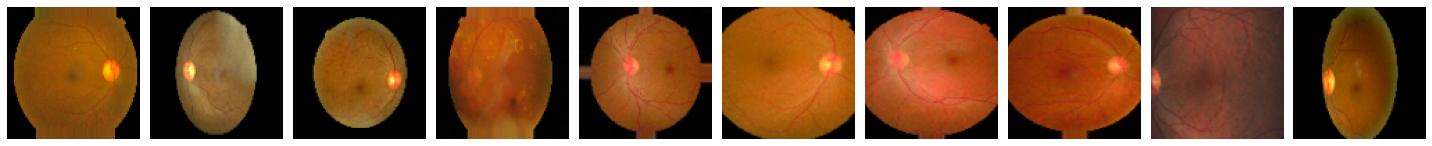

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
import matplotlib.pyplot as plt

imgs, labels = next(train_generator)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)




dict = test_generator.class_indices

  


In [ ]:
y_train = train_df['diagnosis']
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
num_classes = y_train.shape[1]

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, GaussianNoise, GaussianDropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, SeparableConv2D
from keras.constraints import maxnorm
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import regularizers, optimizers

In [ ]:
#https://deeplizard.com/learn/video/daovGOlMbT4

def build_model():
  model = Sequential([
    Conv2D(filters=15, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(96,96,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=5, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
  return model




In [ ]:
model = build_model()

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 15)        420       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        8704      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 184325    
Total params: 193,449
Trainable params: 193,449
Non-trainable params: 0
__________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es= EarlyStopping(monitor='accuracy', mode ='min', verbose = 1, patience = 20)
mc = ModelCheckpoint('/content/gdrive/MyDrive/kaggle/data/model1-1.h5', monitor='accuracy', save_best_only = True, mode ='min', verbose = 1)

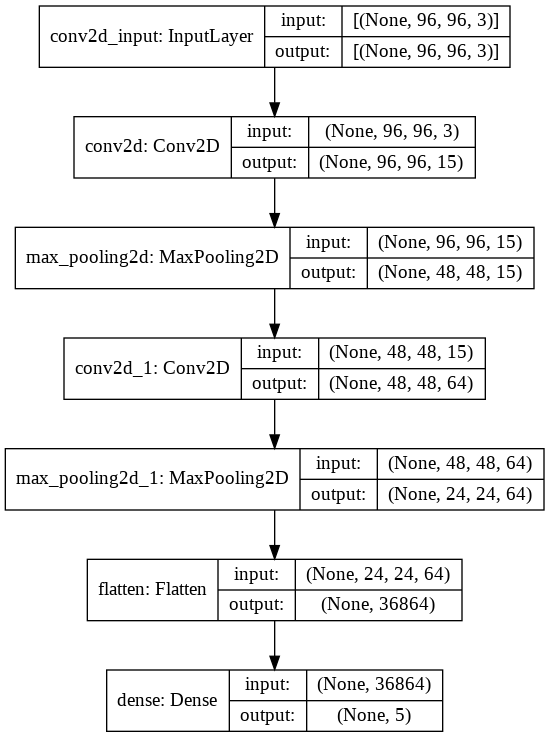

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/gdrive/MyDrive/kaggle/model1-1-plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
len(test_generator)

46

In [ ]:
history = model.fit(x=train_generator,
    steps_per_epoch=len(train_generator),#length of train batches is number of samples/batch size 
    validation_data=test_generator,
    validation_steps=len(test_generator),
    epochs=3,
    callbacks = [es, mc],
    use_multiprocessing = True,
    verbose=2
)




Epoch 1/3
184/184 - 1574s - loss: 1.1775 - accuracy: 0.5300 - val_loss: 1.2565 - val_accuracy: 0.4850

Epoch 00001: accuracy improved from inf to 0.53003, saving model to /content/gdrive/MyDrive/kaggle/data/model1-1.h5
Epoch 2/3
184/184 - 1097s - loss: 1.0598 - accuracy: 0.6058 - val_loss: 1.0449 - val_accuracy: 0.6462

Epoch 00002: accuracy did not improve from 0.53003
Epoch 3/3
184/184 - 1068s - loss: 1.0121 - accuracy: 0.6352 - val_loss: 1.0146 - val_accuracy: 0.6202

Epoch 00003: accuracy did not improve from 0.53003


In [ ]:


# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 
hist_df.to_csv (r'/content/gdrive/MyDrive/kaggle/results/history-model1-1.csv', index = False, header=True)



In [ ]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.177461,0.530034,1.256516,0.484973
1,1.059821,0.605802,1.044873,0.646175
2,1.012071,0.635154,1.014589,0.620219


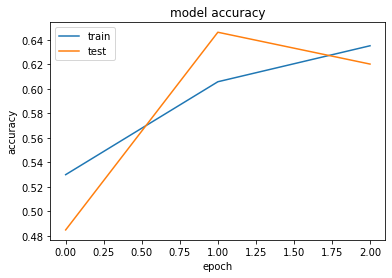

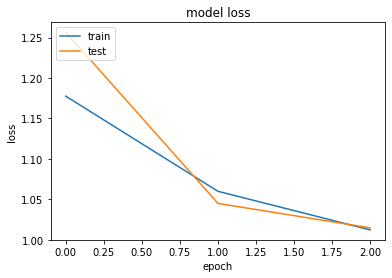

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/kaggle/data/graph-model1-1acc')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/kaggle/data/graph-model1-1loss')
plt.show()

In [ ]:
Conclusion

In [ ]:
submission_df = pd.read_csv('/content/gdrive/MyDrive/kaggle/data/sample_submission.csv')
#submission_df['diagnosis'] = submission_df['diagnosis'].astype('str')
submission_df['filename'] = submission_df['id_code'].astype(str)+'.png'

In [ ]:
sub_image_path = '/content/gdrive/MyDrive/kaggle/data/test_images'
submission_datagen=ImageDataGenerator(rescale=1./255)
submission_gen=submission_datagen.flow_from_dataframe(
    dataframe=submission_df,
    directory=sub_image_path,
    x_col="filename",    
    batch_size=batch_size,
    shuffle=False,
    class_mode=None, 
    target_size=(image_size,image_size)
)

Found 1928 validated image filenames.


In [ ]:
predictions=model.predict_generator(submission_gen, steps = len(submission_gen))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
max_probability = np.argmax(predictions,axis=1) 

In [ ]:
#submission_df.drop(columns=['filename'], inplace= True)
submission_df['diagnosis'] = max_probability
submission_df.to_csv('/content/gdrive/MyDrive/kaggle/data/submission.csv', index=False)

In [ ]:
#save model 

model.save('/content/gdrive/MyDrive/kaggle/data/model1')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/kaggle/data/model1/assets
